# 제목

## #01. 패키지 준비하기

In [11]:
from calendar import *
print(calendar(2023))
print(prmonth(2023,12))

                                  2023

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
                   1             1  2  3  4  5             1  2  3  4  5
 2  3  4  5  6  7  8       6  7  8  9 10 11 12       6  7  8  9 10 11 12
 9 10 11 12 13 14 15      13 14 15 16 17 18 19      13 14 15 16 17 18 19
16 17 18 19 20 21 22      20 21 22 23 24 25 26      20 21 22 23 24 25 26
23 24 25 26 27 28 29      27 28                     27 28 29 30 31
30 31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
                1  2       1  2  3  4  5  6  7                1  2  3  4
 3  4  5  6  7  8  9       8  9 10 11 12 13 14       5  6  7  8  9 10 11
10 11 12 13 14 15 16      15 16 17 18 19 20 21      12 13 14 15 16 17 18
17 18 19 20 21 22 23      22 23 24 25 26 27 28      19 20 21 22 23 24 25
24 25 26 27 28 29 30      

In [1]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame, merge
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import StandardScaler

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터셋 준비하기

In [3]:
origin = read_excel("C:/Users/User/Desktop/2023년_8월말_인구현황_최종수11정.xlsx")
origin

,행정구별_공영주차장_주차면수,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,세대당_인구
0,374,16,5141,21246,43324,2.02
1,0,1,437,1677,2628,1.66
2,0,0,529,2125,3078,1.73
3,0,1,1345,4515,5966,1.79
4,0,2,1338,5383,8794,1.78
5,0,0,1176,5051,7184,1.61
6,0,0,1088,4598,7261,1.84
7,0,0,1182,3795,5864,1.78
8,0,0,477,2210,3450,1.69
9,0,0,504,1802,2426,1.90


## #03. 데이터 전처리

### 결측치 확인

In [4]:
origin.isna().sum()

행정구별_공영주차장_주차면수    0
행정구별_공원수           0
행정구별_사업체수          0
행정구별_자동차_등록현황      0
전체인구               0
세대당_인구             0
dtype: int64

## #04. 탐색적 데이터 분석

### 기본통계 확인

In [5]:
origin.describe()

,행정구별_공영주차장_주차면수,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,세대당_인구
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,67.708333,2.916667,1187.083333,8214.125000,16312.958333,2.267083
std,149.113170,5.081224,1183.636876,5248.553244,11613.511245,0.467821
min,0.000000,0.000000,0.000000,1677.000000,2426.000000,1.610000
25%,0.000000,0.000000,497.250000,4450.500000,6879.500000,1.787500
50%,0.000000,0.000000,1064.000000,6299.000000,12406.000000,2.285000
75%,3.250000,2.750000,1360.750000,11473.500000,25870.750000,2.662500
max,572.000000,16.000000,5141.000000,21246.000000,43324.000000,2.970000


> 평균값의 차이가 크기 때문에 표준화가 필요해 보인다.

### 상자그림

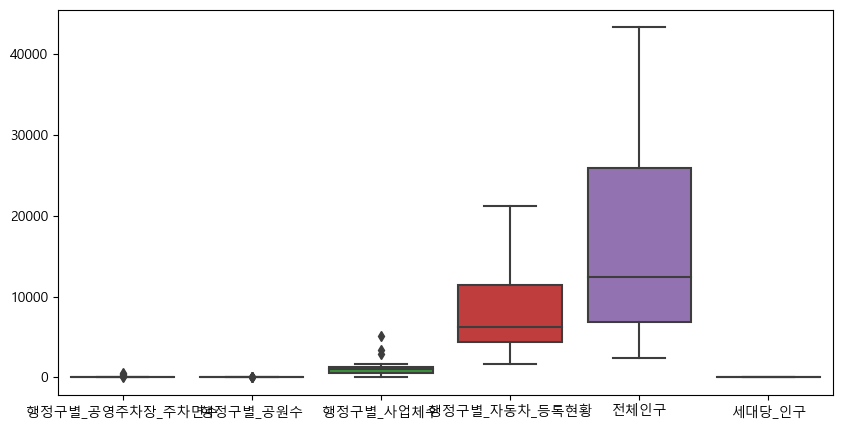

In [6]:
plt.figure(figsize=(10, 5))
sb.boxplot(data=origin)
plt.show()
plt.close()

> 데이터의 분포가 상이하므로 표준화가 필요해 보인다.

### 산점도 그래프와 추세선 확인

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x3000 with 0 Axes>

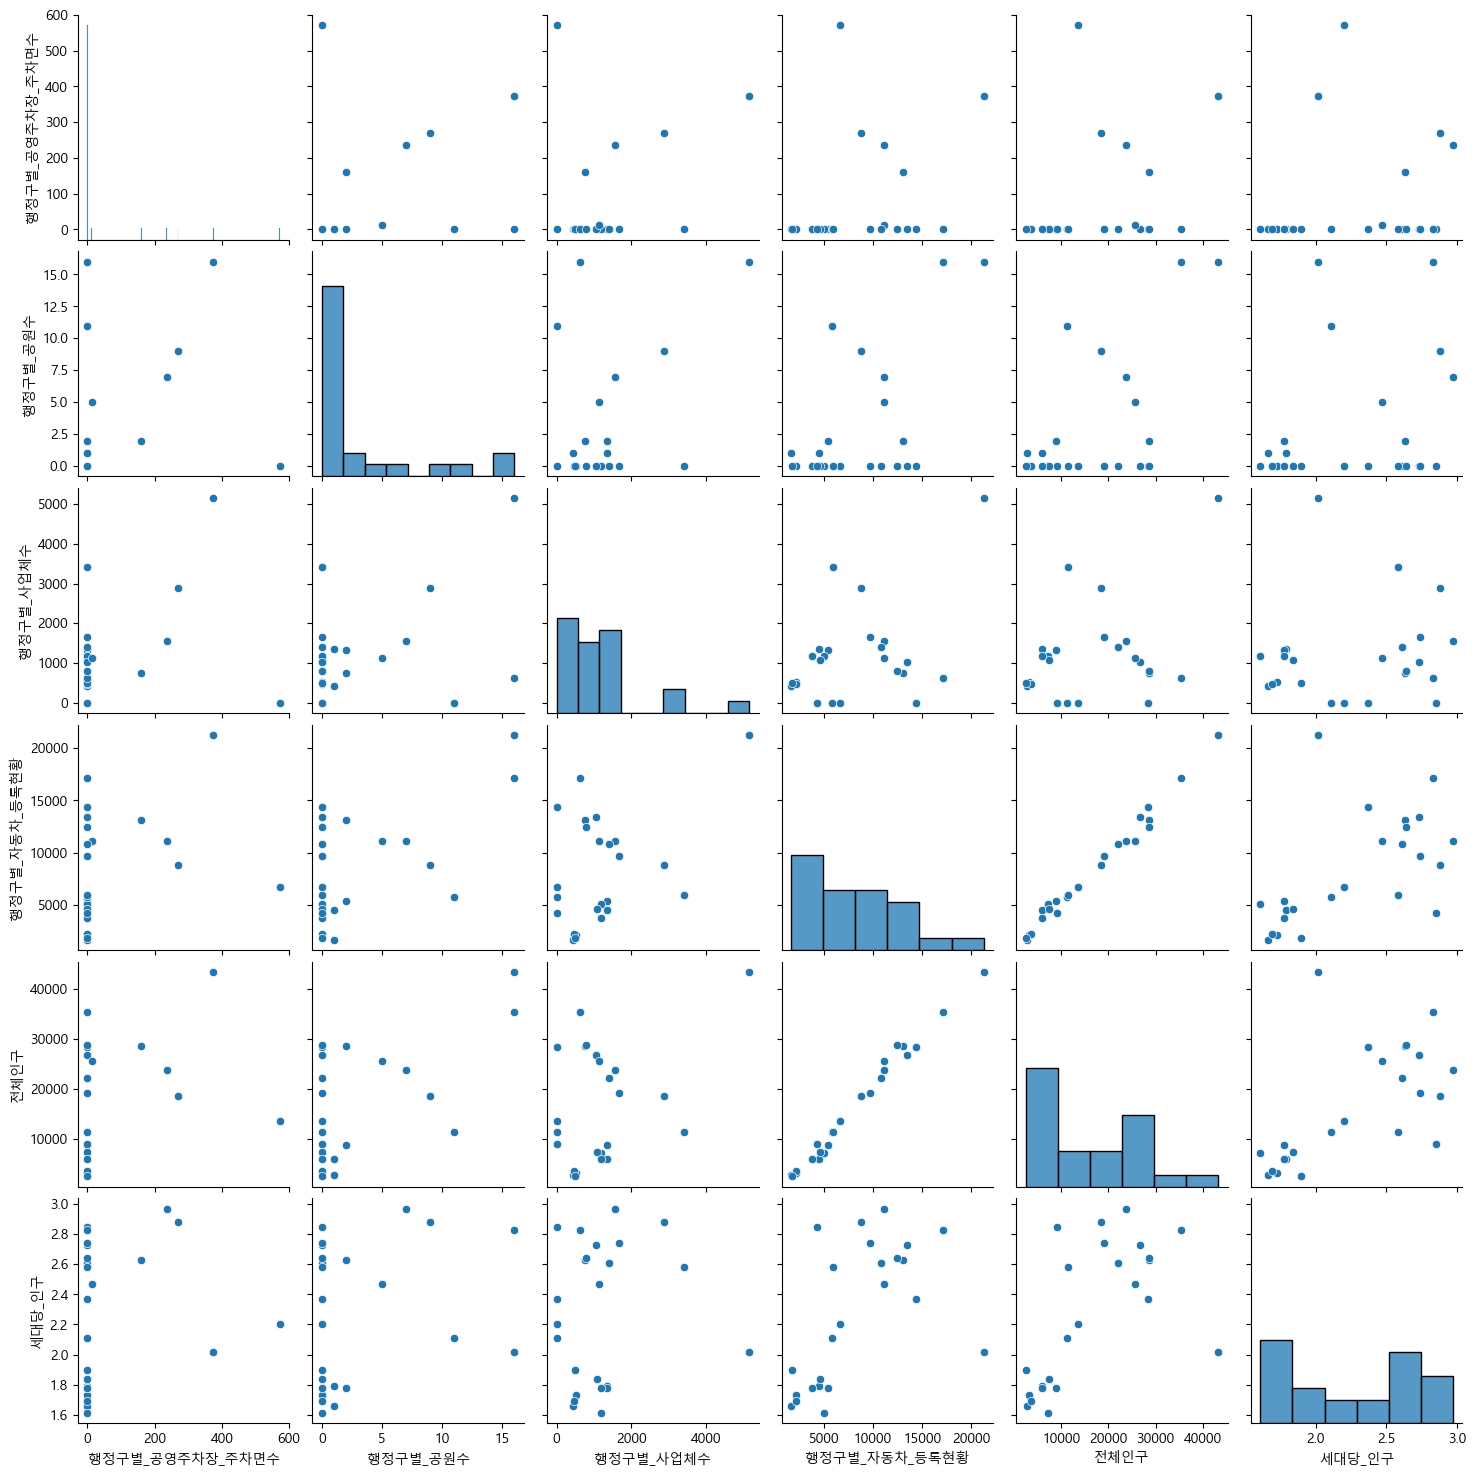

In [7]:
plt.figure(figsize=(30, 30))
sb.pairplot(origin)
plt.show()
plt.close()

> 다중공선성이 발생할 것으로 보이고, 선형회귀보다는 다항회귀가 더 적합해 보이지만 예제를 위해 다항선형회귀로 진행하기로 함

## #05. 데이터셋 분할하기

### 랜덤시드 고정

In [8]:
np.random.seed(777)

### 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [9]:
origin.columns

Index(['행정구별_공영주차장_주차면수', '행정구별_공원수', '행정구별_사업체수', '행정구별_자동차_등록현황', '전체인구',
       '세대당_인구'],
      dtype='object')

In [10]:
x = origin[['행정구별_공영주차장_주차면수', '행정구별_공원수', '행정구별_사업체수', '행정구별_자동차_등록현황','세대당_인구']]
y = origin[['전체인구']]
x.shape, y.shape

((24, 5), (24, 1))

### 데이터 표준화

In [11]:
x_scaller = StandardScaler()
x_scale = x_scaller.fit_transform(x)

y_scaller = StandardScaler()
y_scale = y_scaller.fit_transform(y)

x_scale.shape, y_scale.shape

((24, 5), (24, 1))

### 표준화 전 후 상자그림 비교

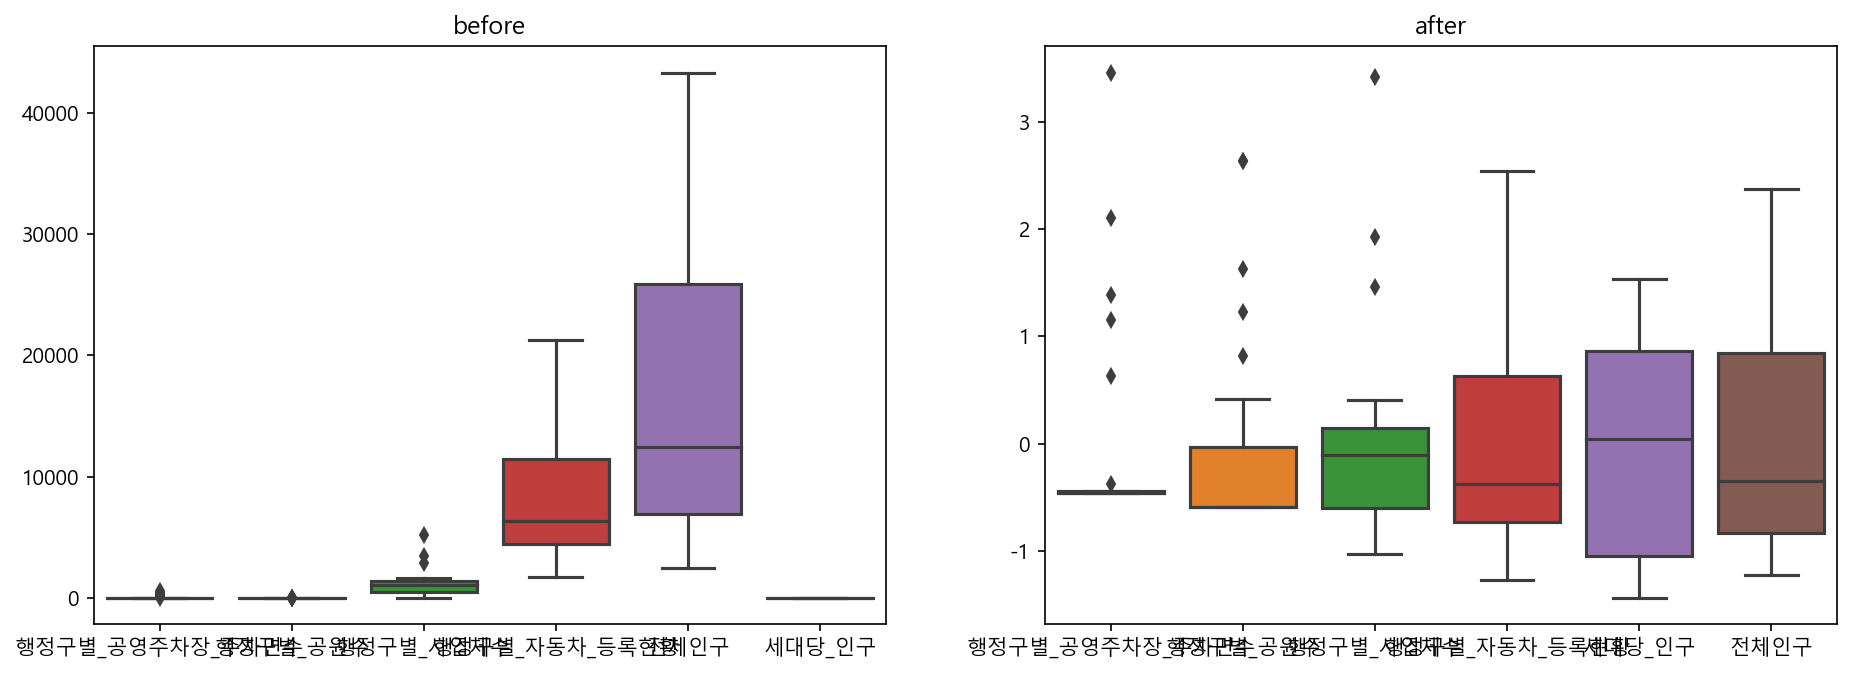

In [12]:
# 임시로 독립변수와 종속변수를 하나의 DataFrame으로 병합
x_scale_df = DataFrame(x_scale, columns=['행정구별_공영주차장_주차면수', '행정구별_공원수', '행정구별_사업체수', '행정구별_자동차_등록현황','세대당_인구'])
y_scale_df = DataFrame(y_scale, columns=['전체인구'])
tmp = merge(x_scale_df, y_scale_df, left_index=True, right_index=True)

fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=150)
sb.boxplot(data=origin, ax=ax[0])
sb.boxplot(data=tmp, ax=ax[1])
ax[0].set_title('before')
ax[1].set_title('after')
plt.show()
plt.close()

### 훈련 데이터와 검증 데이터로 분할

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y_scale, test_size=0.3, random_state=777)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16, 5), (8, 5), (16, 1), (8, 1))

## #06. 모델 개발

### 모델 정의

데이터가 단순하고 개수가 적다면 과대적합이 발생할 확률이 높기 때문에 주의하면서 적절한 크기의 모델층을 쌓아야 한다.

In [14]:
model = Sequential()

# 1차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (len(x_train[0]), )))
model.add(Dense(32, activation = 'relu'))

# 하나의 값을 출력 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습하기

In [15]:
result = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), callbacks=[
    EarlyStopping(monitor='val_loss', patience=10, verbose=1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.001, verbose=1)
])

Epoch 1/500
1/1 [==============================] - 1s 670ms/step - loss: 1.3940 - mae: 1.0851 - val_loss: 1.0184 - val_mae: 0.8220 - lr: 0.0010
Epoch 2/500
1/1 [==============================] - 0s 24ms/step - loss: 1.2955 - mae: 1.0487 - val_loss: 0.9518 - val_mae: 0.7993 - lr: 0.0010
Epoch 3/500
1/1 [==============================] - 0s 35ms/step - loss: 1.1995 - mae: 1.0117 - val_loss: 0.8893 - val_mae: 0.7773 - lr: 0.0010
Epoch 4/500
1/1 [==============================] - 0s 30ms/step - loss: 1.1083 - mae: 0.9750 - val_loss: 0.8300 - val_mae: 0.7554 - lr: 0.0010
Epoch 5/500
1/1 [==============================] - 0s 29ms/step - loss: 1.0204 - mae: 0.9383 - val_loss: 0.7728 - val_mae: 0.7331 - lr: 0.0010
Epoch 6/500
1/1 [==============================] - 0s 29ms/step - loss: 0.9355 - mae: 0.9012 - val_loss: 0.7202 - val_mae: 0.7112 - lr: 0.0010
Epoch 7/500
1/1 [==============================] - 0s 27ms/step - loss: 0.8546 - mae: 0.8640 - val_loss: 0.6714 - val_mae: 0.6893 - lr: 0.001

## #07. 학습 결과 평가

In [16]:
# 학습결과
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

,loss,mae,val_loss,val_mae,lr
epochs,,,,,
1,1.393960,1.085065,1.018408,0.821967,0.001
2,1.295545,1.048749,0.951789,0.799323,0.001
3,1.199550,1.011681,0.889284,0.777302,0.001
4,1.108324,0.975018,0.829957,0.755423,0.001
5,1.020441,0.938330,0.772838,0.733059,0.001
6,0.935461,0.901227,0.720212,0.711177,0.001
7,0.854556,0.864031,0.671351,0.689314,0.001
8,0.777538,0.826743,0.626631,0.667898,0.001
9,0.705960,0.790069,0.586020,0.650901,0.001


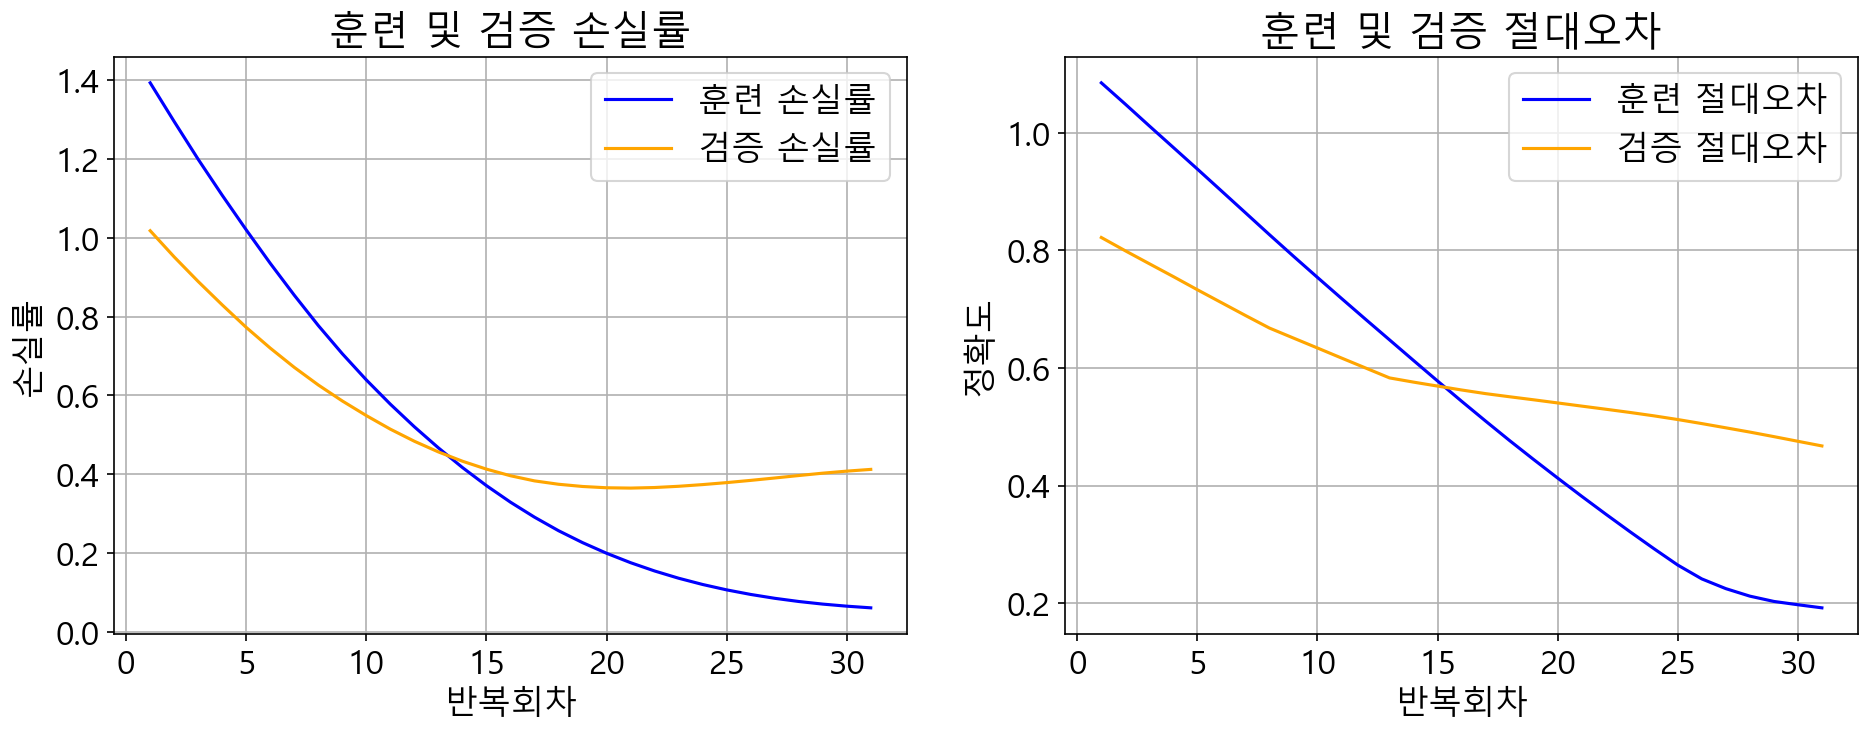

In [17]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sb.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sb.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

In [18]:
evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

1/1 [==============================] - 0s 23ms/step - loss: 0.0573 - mae: 0.1863


최종 훈련 손실률: 0.057297, 최종 훈련 절대오차: 0.186317
1/1 [==============================] - 0s 18ms/step - loss: 0.4123 - mae: 0.4674
최종 검증 손실률: 0.412315, 최종 검증 절대오차: 0.467418


## #08. 학습 결과 적용

### 예측 결과 산정

In [19]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

1/1 [==============================] - 0s 22ms/step


### 결과 데이터 셋 구성

x_scale_df = DataFrame(x_scale, columns=['주행 실적 수', '주행 거리', '온실가스'])
y_scale_df = DataFrame(y_scale, columns=['마일리지'])

In [20]:
train_df = DataFrame(x_train, columns=['행정구별_공영주차장_주차면수', '행정구별_공원수', '행정구별_사업체수', '행정구별_자동차_등록현황','세대당_인구'])
train_df['전체인구(관측치)'] = y_train.flatten()
train_df['전체인구(예측치)'] = train_pred.flatten()

train_df['훈련오차'] = train_df['전체인구(관측치)']-train_df['전체인구(예측치)']

train_df.head()

,행정구별_공영주차장_주차면수,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,세대당_인구,전체인구(관측치),전체인구(예측치),훈련오차
0,-0.46384,-0.586354,-0.009565,-0.615628,-1.434771,-0.802970,-0.978206,0.175236
1,-0.46384,-0.184283,0.130245,-0.551012,-1.063568,-0.661357,-0.740492,0.079135
2,-0.46384,-0.586354,1.923610,-0.448249,0.683268,-0.440493,-0.191238,-0.249254
3,-0.46384,-0.385319,-0.647340,-1.272298,-1.325594,-1.203709,-1.101365,-0.102344
4,-0.46384,-0.586354,-0.126937,1.020792,1.010799,0.910815,0.881802,0.029012


x_scale_df = DataFrame(x_scale, columns=['외국인합계', '총인구합계', '세대당인구'])
y_scale_df = DataFrame(y_scale, columns=['인구밀도'])

In [21]:
test_df = DataFrame(x_test, columns=['행정구별_공영주차장_주차면수', '행정구별_공원수', '행정구별_사업체수', '행정구별_자동차_등록현황','세대당_인구'])
test_df['전체인구(관측치)'] = y_test.flatten()
test_df['전체인구(예측치)'] = test_pred.flatten()

test_df['훈련오차'] = test_df['전체인구(관측치)']-test_df['전체인구(예측치)']

test_df.head()

,행정구별_공영주차장_주차면수,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,세대당_인구,전체인구(관측치),전체인구(예측치),훈련오차
0,-0.46384,-0.586354,0.407276,0.292499,1.032635,0.242242,0.485295,-0.243053
1,-0.46384,-0.586354,-1.024482,1.193815,0.224723,1.058497,0.689036,0.369461
2,-0.46384,-0.586354,-0.612819,-1.168562,-1.260087,-1.131407,-1.123279,-0.008129
3,-0.46384,-0.586354,-0.589518,-1.247970,-0.801543,-1.221477,-1.036572,-0.184905
4,1.38581,1.222968,1.460166,0.110329,1.338331,0.188675,1.227554,-1.038880


### 실제 결과값과 머신러닝에 의한 예측값 비교

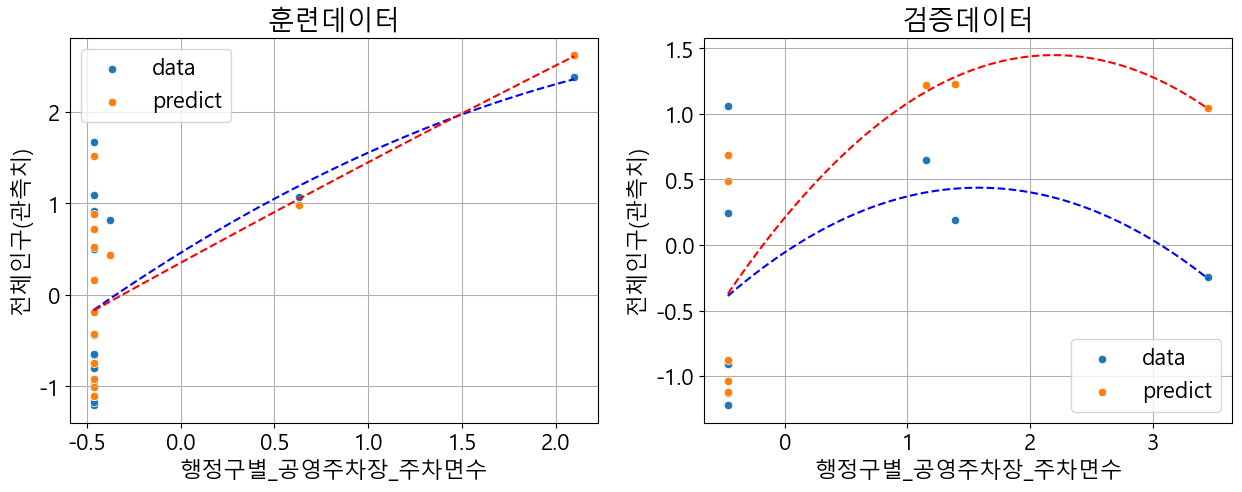

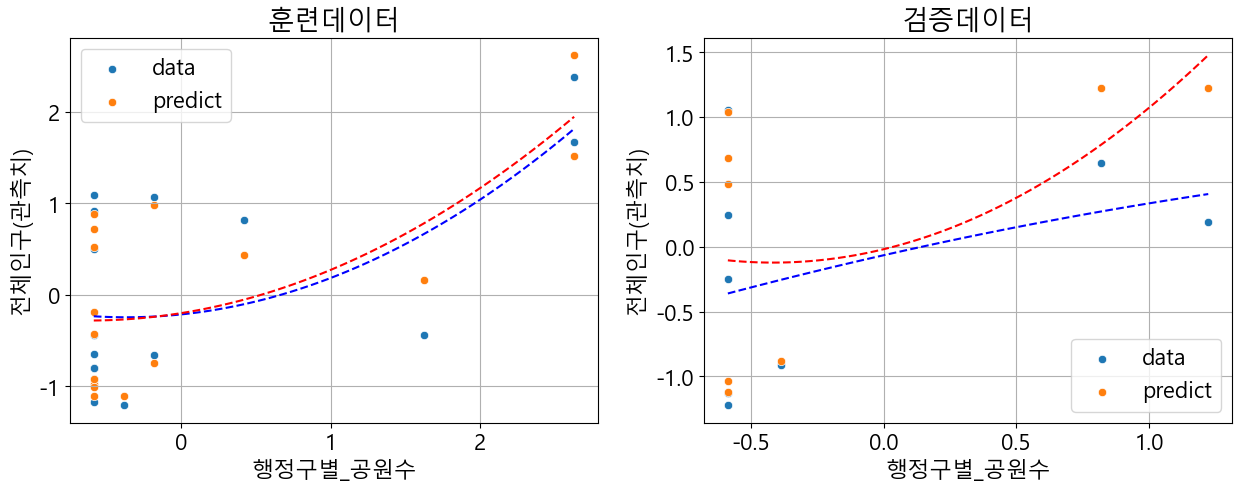

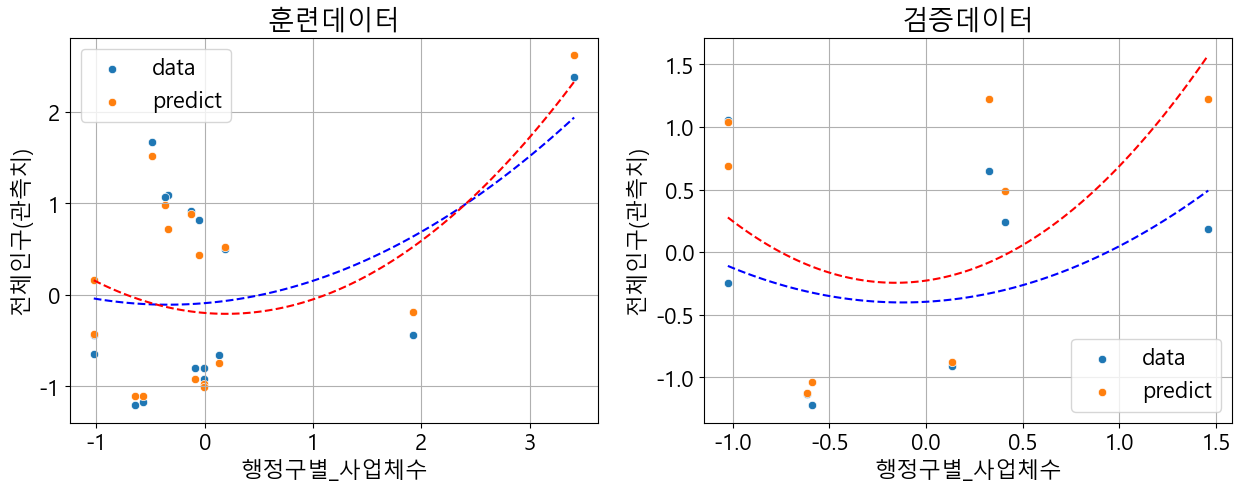

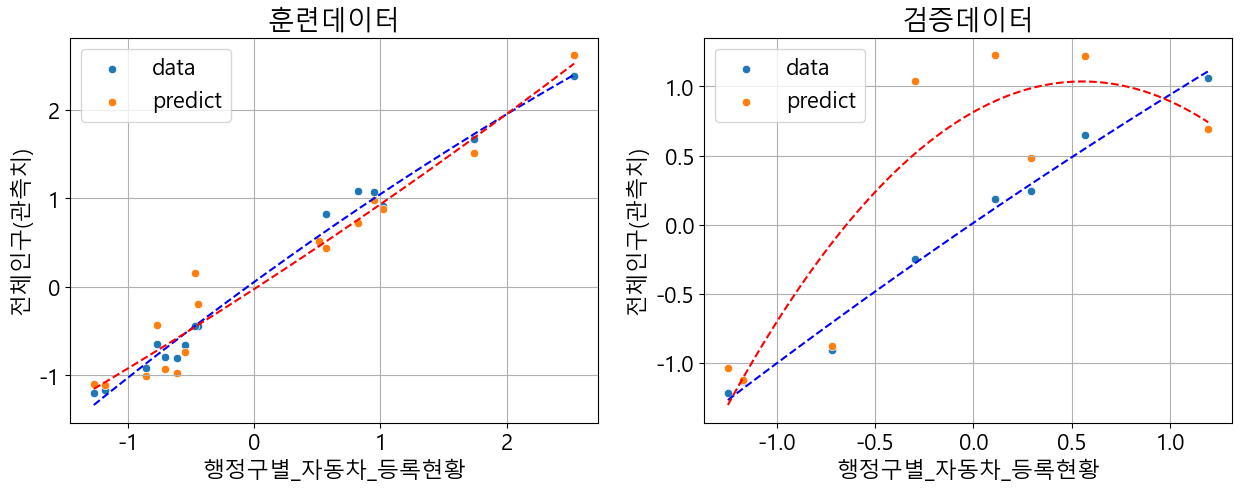

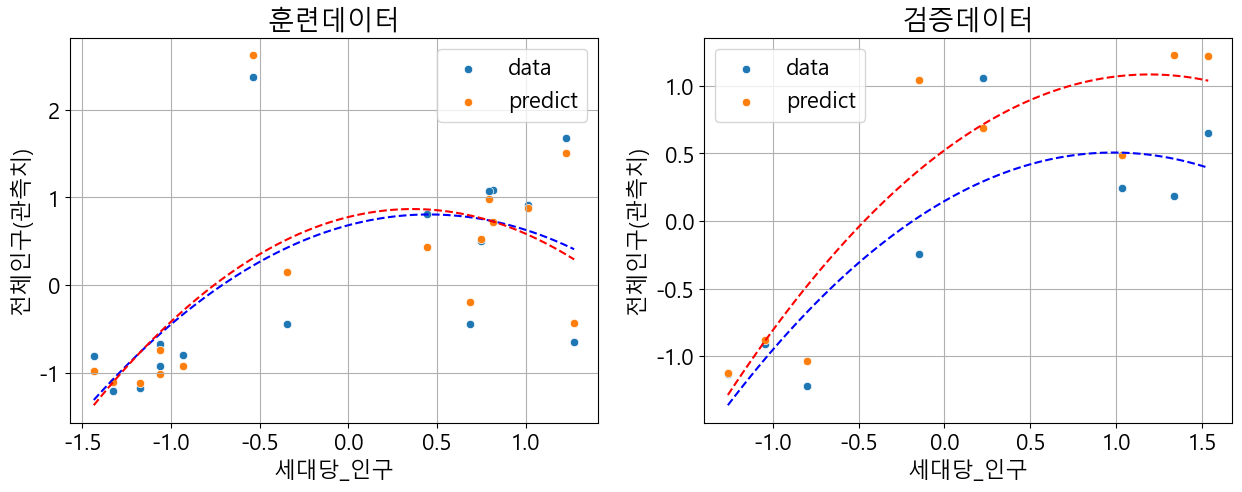

In [22]:
for key in ['행정구별_공영주차장_주차면수', '행정구별_공원수', '행정구별_사업체수', '행정구별_자동차_등록현황','세대당_인구']:
    helper.regplot(train_df[key], train_df['전체인구(관측치)'], train_df['전체인구(예측치)'], "훈련데이터",
                   test_df[key], test_df['전체인구(관측치)'], test_df['전체인구(예측치)'], "검증데이터",
                   figsize=(15, 5))